### Ion channels enable electrical communication in bacterial communities
Arthur Prindle, Jintao Liu, Munehiro Asally, San Ly, Jordi Garcia-Ojalvo, and Gürol M. Süel
<br>
https://www.nature.com/articles/nature15709

**Figure 3d: Effect of KCl shock on wilt-type and $\Delta$yugO strain**<br>
Jordi Garcia-Ojalvo, jordi.g.ojalvo@upf.edu

---

Here we model the effect of a KCl shock on both the wild-type and yugO deletion strains. We represent the KCl shock by means of a short pulse of extracellular potassium.

First we load all necessary python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.facecolor'] = '#f2f2f2'

Next we define the model parameters:

In [2]:
gk = 30
gl = 0.2
Vk = -380
Vl = -156
Sth = 0.04
Vth = -150
a0 = 2 
b0 = 1.3 
m = 1
sa = 0.2
ge = 10
dl = 8
dk = 1
bs = 0.001
gs = 0.1
gt = 4
F = 5.6
kshock = 200

Next we define the model:

In [3]:
Sthm = Sth**m
Vss = Vk+ge*gl*(Vk-Vl)/(-ge*gl)

def f(vne,t):
    V, n, E, S, T, N, A = vne
    a = a0*S**m/(Sthm+S**m)
    b = b0
    Sin = bs*(Vth-V)/(np.exp((Vth-V)/sa)-1)
    Tin = bs*(Vss-V)
    Vls = Vl+dl*E
    Vks = Vk+dk*E
    dVdt = -gk*n**4*(V-Vks) - gl*(V-Vls)
    dndt = a*(1-n)-b*n
    dEdt = F*gk*n**4*(V-Vks) - ge*E
    dSdt = Sin - gs*S
    dTdt = Tin - gt*T
    dNdt = bs*S - gs*N
    dAdt = bs*E - gs*A
    return [dVdt, dndt, dEdt, dSdt, dTdt, dNdt, dAdt]

Next we simulate the wild-type case:

In [4]:
Tmax = 350
dt = 0.01
vne0 = [1, 1, 0, 0, 0, 0, 0]
tvec0 = np.arange(0,Tmax,dt)
vne0_out = odeint(f, vne0, tvec0)

Tmax = 50
tvec = np.arange(0,Tmax,dt)
vne0 = [vne0_out[-1,0], vne0_out[-1,1], vne0_out[-1,2]+kshock, vne0_out[-1,3], vne0_out[-1,4], vne0_out[-1,5], vne0_out[-1,6]]
vne_out = odeint(f, vne0, tvec)

thtts = np.concatenate((vne0_out[:,4],vne_out[:,4]),axis=0)
normf = np.amax(abs(thtts[20000:-1]))
thtts = thtts*50/normf
tts = np.concatenate((tvec0[:],tvec[:]+tvec0[-1]),axis=0)-330

Next we simulate the yugO deletion case, by eliminating the K channel:

In [5]:
gk = 0

Tmax = 350
dt = 0.01
vne0 = [1, 1, 0, 0, 0, 0, 0]
tvec0 = np.arange(0,Tmax,dt)
vne0_out = odeint(f, vne0, tvec0)

Tmax = 50
tvec = np.arange(0,Tmax,dt)
vne0 = [vne0_out[-1,0], vne0_out[-1,1], vne0_out[-1,2]+kshock, vne0_out[-1,3], vne0_out[-1,4], vne0_out[-1,5], vne0_out[-1,6]]
vne_out = odeint(f, vne0, tvec)

thtts2 = np.concatenate((vne0_out[:,4],vne_out[:,4]),axis=0)
tts2 = np.concatenate((tvec0[:],tvec[:]+tvec0[-1]),axis=0)-330
thtts2 = thtts2*50/normf

Finally we plot the ThT reporter as a function of time for the wild-type and yugO deletion strains:

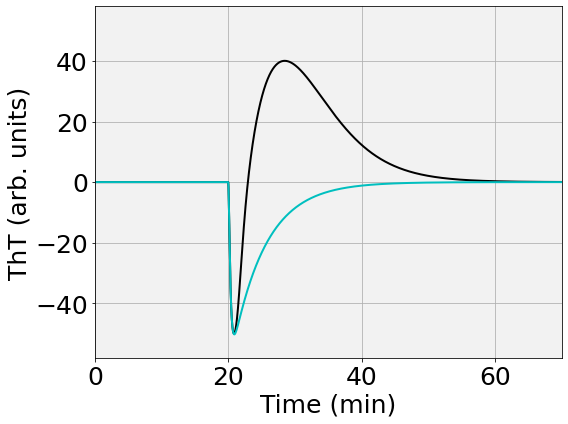

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(tts,thtts,'k',linewidth=2)
plt.plot(tts2,thtts2,'c',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('ThT (arb. units)')
plt.xlim(0,70)
plt.ylim(-58,58)
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('figures/fig3d.pdf')